In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    RocCurveDisplay
)

# Interpretability
import shap  # For SHAP explanations (install with `pip install shap`)

In [ ]:
df = pd.read_csv("/content/insurance_claims.csv")
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
df.isnull().sum()


,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [ ]:
df.nunique()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [ ]:
df['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [ ]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('Unknown')
df.isna().any()

,0
months_as_customer,False
age,False
policy_number,False
policy_bind_date,False
policy_state,False
policy_csl,False
policy_deductable,False
policy_annual_premium,False
umbrella_limit,False
insured_zip,False


In [ ]:
df.drop(columns=['_c39'], inplace=True)
df.drop(columns=['incident_location'], inplace=True)
df.drop(columns=['policy_number'], inplace=True)
df.drop(columns=['insured_zip'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')


In [ ]:
df[(df['total_claim_amount'] < 0) | (df['vehicle_claim'] < 0)]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


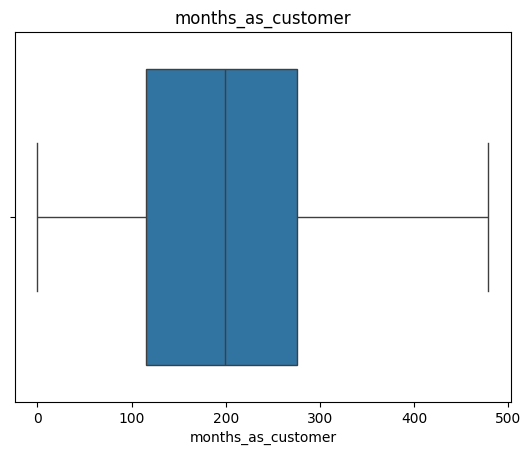

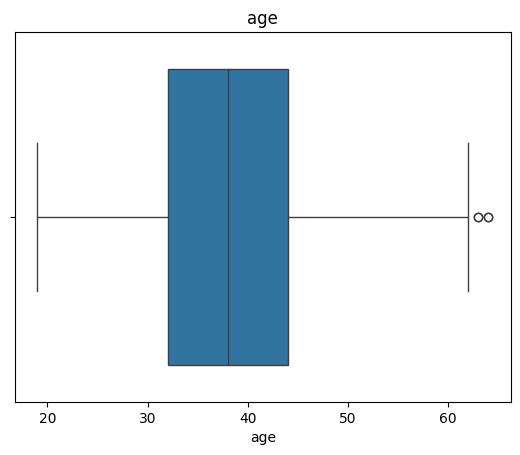

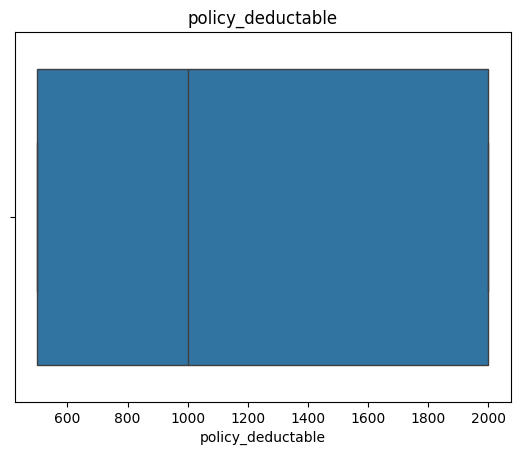

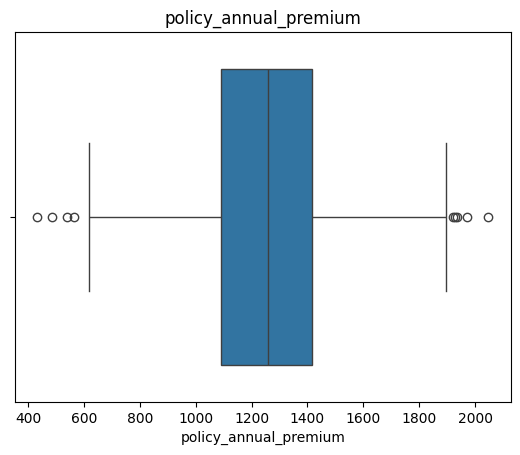

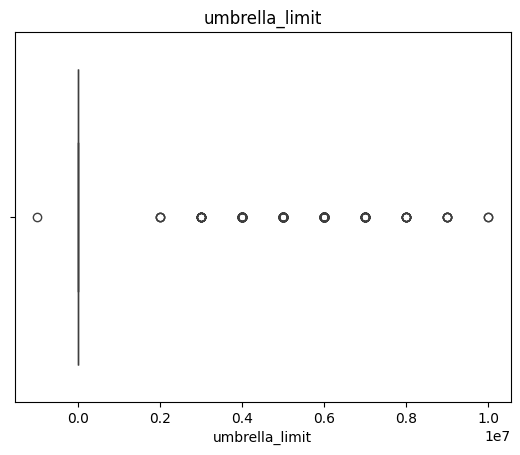

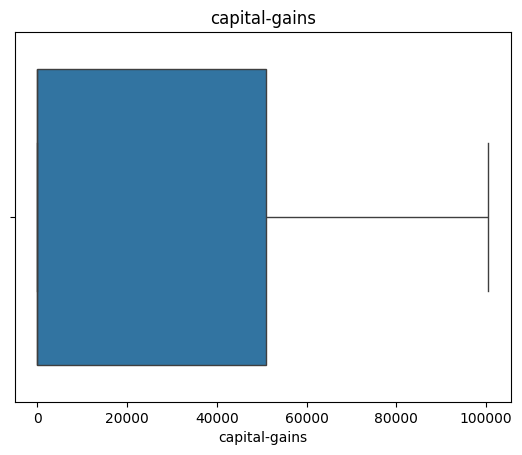

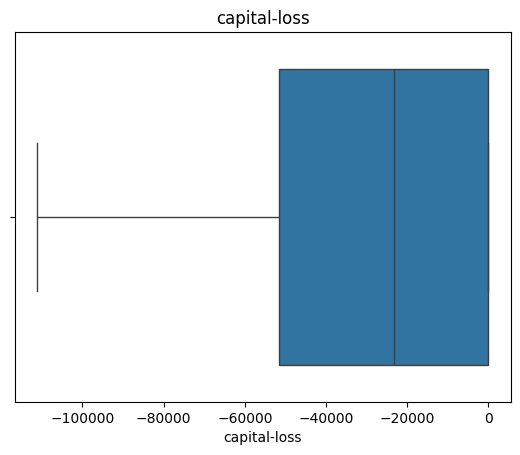

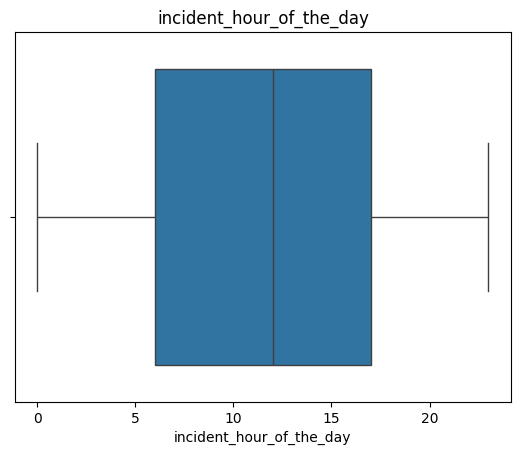

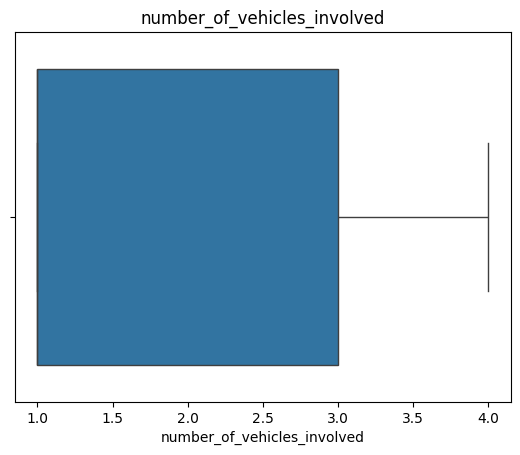

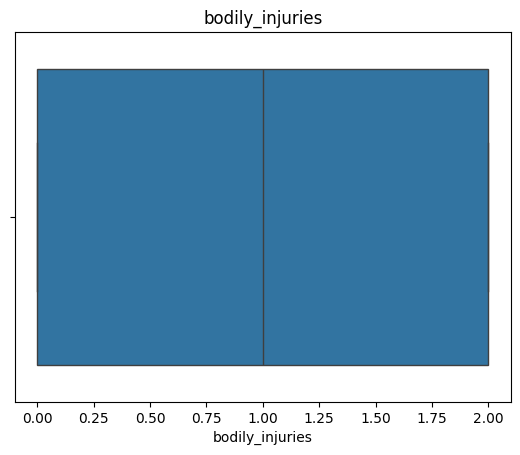

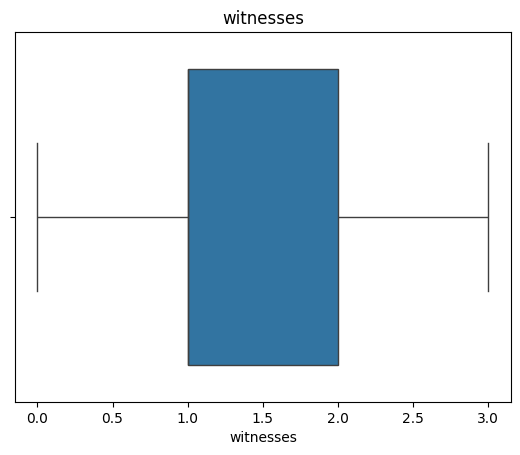

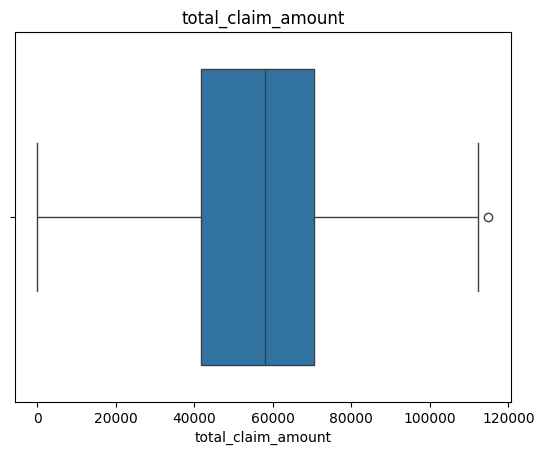

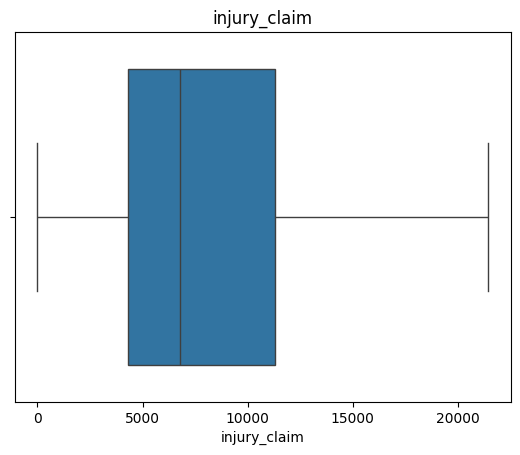

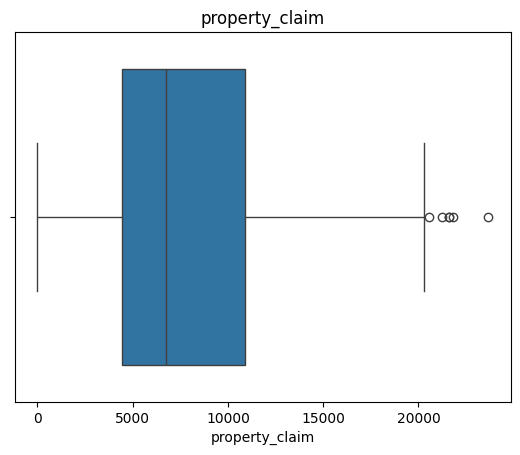

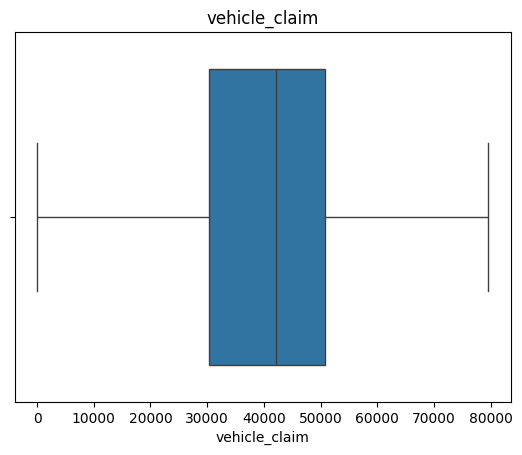

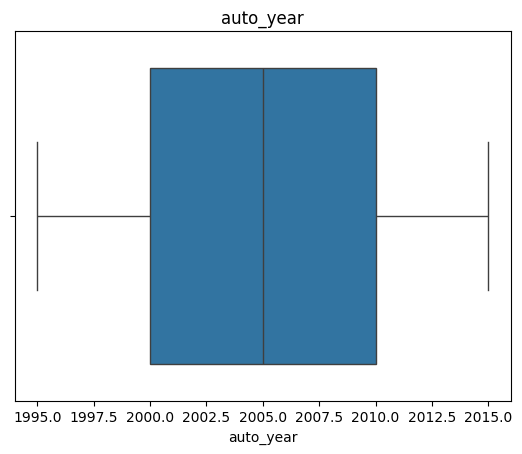

In [ ]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.show()


Boxplot after capping: age


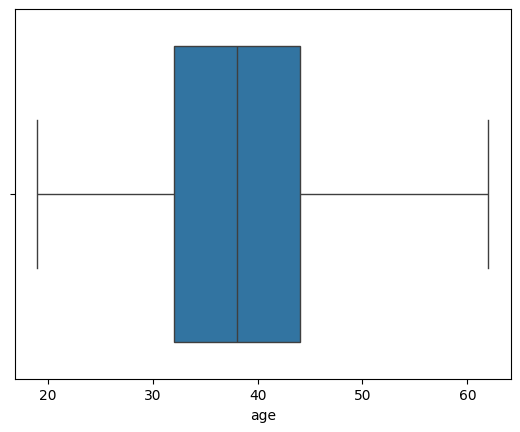

Boxplot after capping: policy_annual_premium


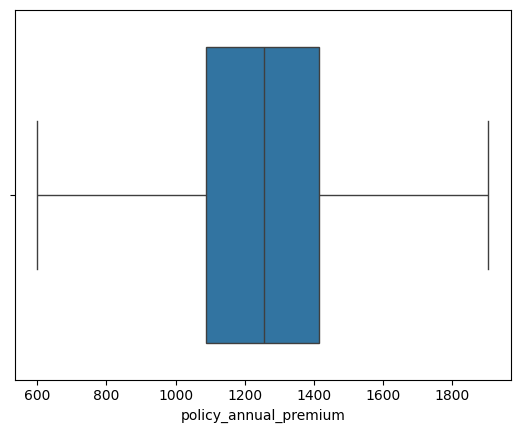

Boxplot after capping: umbrella_limit


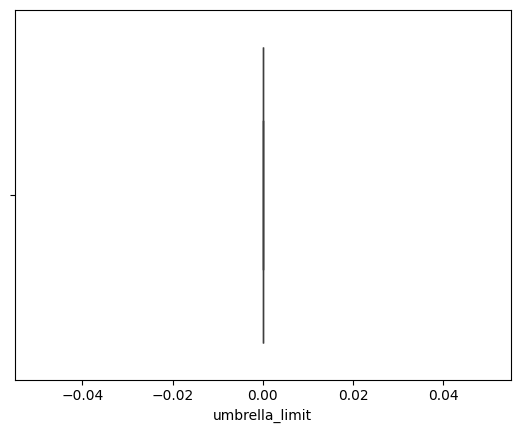

Boxplot after capping: total_claim_amount


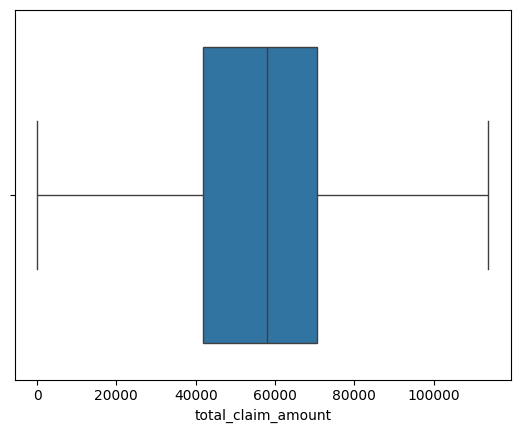

Boxplot after capping: property_claim


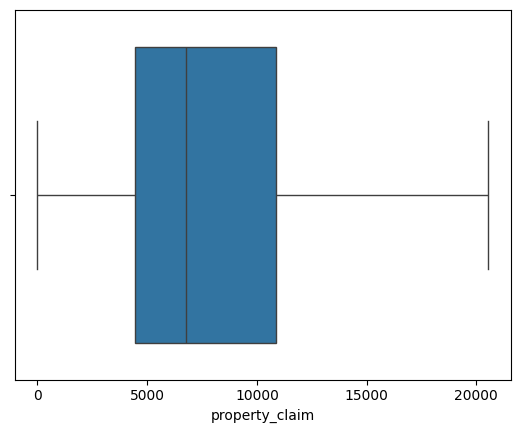

In [ ]:
# Columns for outlier handling
num_features = ['age', 'policy_annual_premium', 'umbrella_limit', 'total_claim_amount', 'property_claim']

# Step 1: Calculate IQR for each selected feature
IQR = []
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR.append(Q3 - Q1)

# Step 2: Compute upper and lower bounds
upper = []
lower = []
for i, col in enumerate(num_features):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    upper.append(Q3 + 1.5 * IQR[i])
    lower.append(Q1 - 1.5 * IQR[i])

# Step 3: Cap the outliers
df['age'] = np.where(df['age'] > upper[0], upper[0],
              np.where(df['age'] < lower[0], lower[0], df['age']))

df['policy_annual_premium'] = np.where(df['policy_annual_premium'] > upper[1], upper[1],
                               np.where(df['policy_annual_premium'] < lower[1], lower[1], df['policy_annual_premium']))

df['umbrella_limit'] = np.where(df['umbrella_limit'] > upper[2], upper[2],
                        np.where(df['umbrella_limit'] < lower[2], lower[2], df['umbrella_limit']))

df['total_claim_amount'] = np.where(df['total_claim_amount'] > upper[3], upper[3],
                            np.where(df['total_claim_amount'] < lower[3], lower[3], df['total_claim_amount']))

df['property_claim'] = np.where(df['property_claim'] > upper[4], upper[4],
                        np.where(df['property_claim'] < lower[4], lower[4], df['property_claim']))

# Step 4: Visualize the boxplots after capping
for col in num_features:
    print(f"Boxplot after capping: {col}")
    sns.boxplot(data=df, x=col)
    plt.show()

In [ ]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.942000,1136.000000,1256.506126,0.0,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52760.782500,7433.420000,7392.360000,37928.950000,2005.103000
std,115.113174,9.124576,611.864673,242.246335,0.0,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26398.830555,4880.951853,4803.547892,18886.252893,6.015861
min,0.000000,19.000000,500.000000,600.476250,0.0,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.0,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.500000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.0,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.000000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.0,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.500000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,62.000000,2000.000000,1904.826250,0.0,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,113762.500000,21450.000000,20545.000000,79560.000000,2015.000000


/tmp/ipython-input-86-2717945195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Set2')


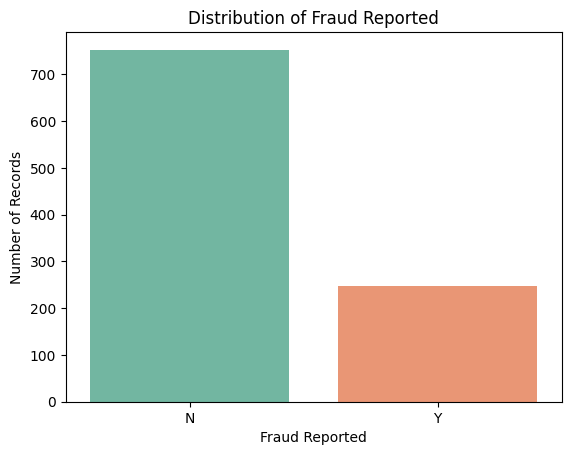

In [ ]:
fraud_counts = df['fraud_reported'].value_counts()

sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Set2')

plt.xlabel("Fraud Reported")
plt.ylabel("Number of Records")
plt.title("Distribution of Fraud Reported")
plt.show()

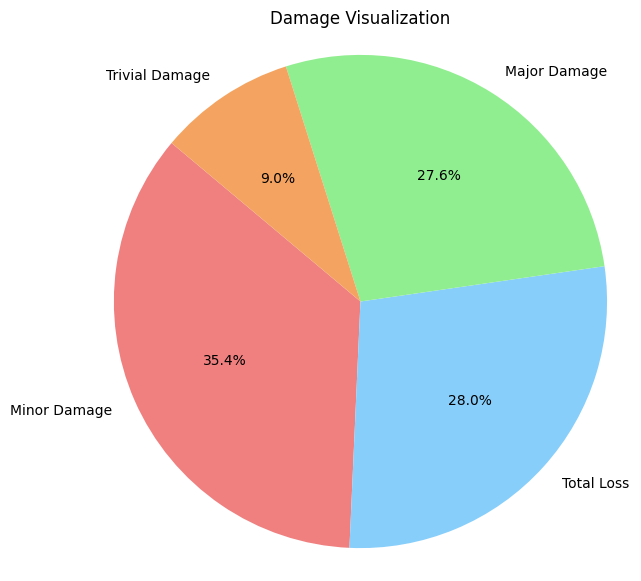

In [ ]:
severity_counts = df['incident_severity'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(severity_counts,
        labels=severity_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightcoral', 'lightskyblue', 'lightgreen', 'sandybrown'])

plt.title("Damage Visualization")
plt.axis('equal')
plt.show()

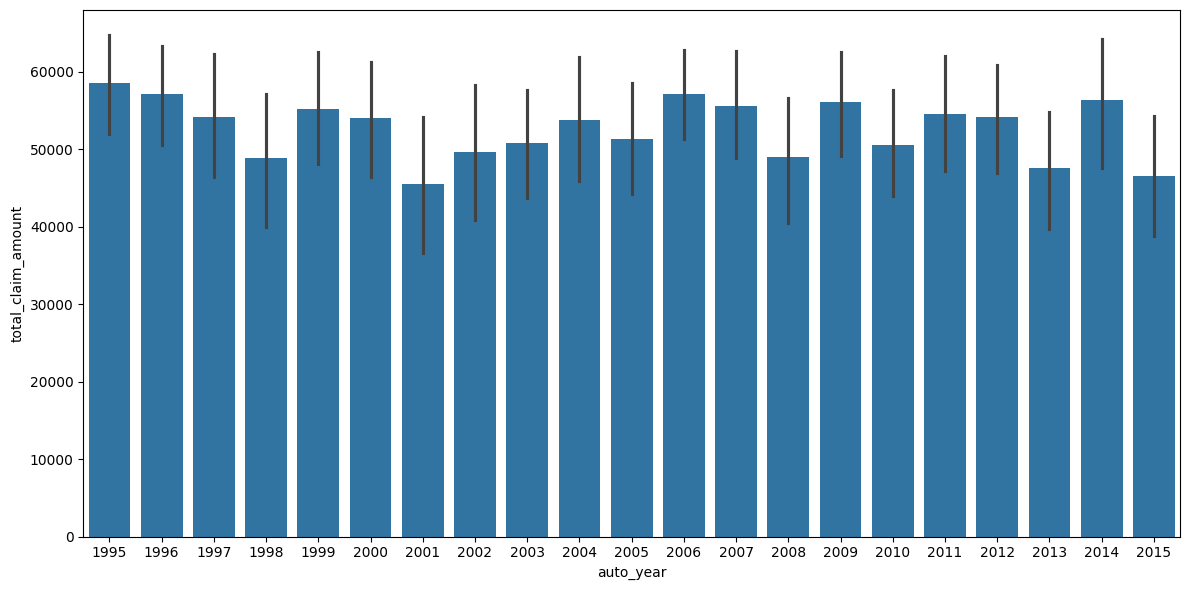

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'auto_year', y = 'total_claim_amount', data = df)
plt.tight_layout()
plt.show()

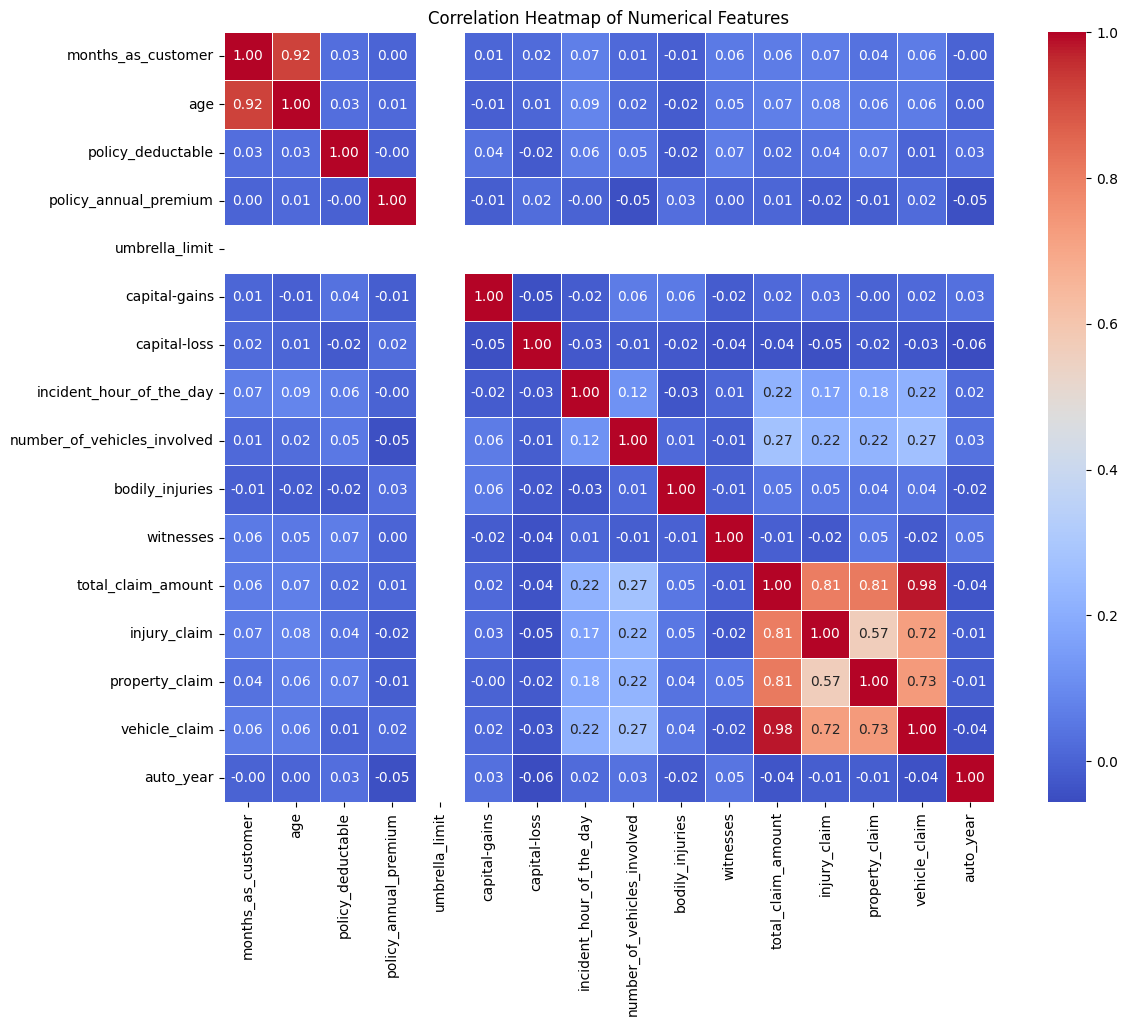

In [ ]:
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            square=True)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,2014-10-17,OH,250/500,1000,1406.91,0.0,MALE,MD,...,2,YES,71610.0,6510,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,2006-06-27,IN,250/500,2000,1197.22,0.0,MALE,MD,...,0,?,5070.0,780,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,2000-09-06,OH,100/300,2000,1413.14,0.0,FEMALE,PhD,...,3,NO,34650.0,7700,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,1990-05-25,IL,250/500,2000,1415.74,0.0,FEMALE,PhD,...,2,NO,63400.0,6340,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,2014-06-06,IL,500/1000,1000,1583.91,0.0,MALE,Associate,...,1,NO,6500.0,1300,650.0,4550,Accura,RSX,2009,N


In [ ]:
df.columns


Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
categorical_columns = ['insured_sex', 'insured_education_level', 'incident_type',
                       'collision_type', 'incident_severity', 'authorities_contacted',
                       'incident_state', 'incident_city', 'auto_make', 'auto_model',
                       'policy_bind_date', 'incident_date', 'insured_occupation','incident_location',
                       'insured_hobbies', 'umbrella_limit', 'property_damage', 'police_report_available',
                       'auto_year', 'witnesses', 'fraud_reported', 'policy_state', 'policy_csl', 'insured_relationship']

le = LabelEncoder()
for col in categorical_columns:
    if col in df.columns: # Added this check for robustness
        df[col] = le.fit_transform(df[col].astype(str))

print("\nObject columns after Label Encoding:")
print(df.select_dtypes(include='object').columns.tolist())
print(df.columns)
# This is where the error occurs:
# Assuming 'fraud_reported' is the target column
X = df.drop('fraud_reported', axis=1) # This line still expects 'fraud_reported' to exist
y = df['fraud_reported']             # And this line as well


Object columns after Label Encoding:
[]
Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [ ]:
# Split into 80% train and 20% test (you can change test_size if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:

from imblearn.over_sampling import SMOTE

# Create SMOTE object
smt = SMOTE(random_state=42)
# Apply SMOTE only on training data
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)


In [ ]:
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test = std_scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

# You can print the accuracies to see the results
print(f"Decision Tree Training Accuracy: {dtc_train_acc:.4f}")
print(f"Decision Tree Test Accuracy: {dtc_test_acc:.4f}")

Decision Tree Training Accuracy: 1.0000
Decision Tree Test Accuracy: 0.7800


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # You'll need to import this

# Assuming X_train, y_train, X_test, y_test are already defined and loaded

rfc = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, n_estimators=140)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Random Forest Training Accuracy: {rfc_train_acc:.4f}")
print(f"Random Forest Test Accuracy: {rfc_test_acc:.4f}")

Random Forest Training Accuracy: 0.9975
Random Forest Test Accuracy: 0.7750


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report # You'll need to import these

# Assuming X_train, y_train, X_test, y_test are already defined and loaded

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[151   0]
 [ 48   1]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       1.00      0.02      0.04        49

    accuracy                           0.76       200
   macro avg       0.88      0.51      0.45       200
weighted avg       0.82      0.76      0.66       200



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming X_train, y_train, X_test, y_test are already defined and loaded

lg = LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
lg.fit(X_train, y_train)

lrg_pred = lg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, lrg_pred))

# Calculate and print training accuracy
lrg_train_acc = accuracy_score(y_train, lg.predict(X_train))
print(f"\nLogistic Regression Training Accuracy: {lrg_train_acc:.4f}")

# Calculate and print test accuracy
lrg_test_acc = accuracy_score(y_test, lrg_pred)
print(f"Logistic Regression Test Accuracy: {lrg_test_acc:.4f}")

# You might also want to print the classification report for more detailed metrics
# print("\nClassification Report:")
# print(classification_report(y_test, lrg_pred))

Confusion Matrix:
[[142   9]
 [ 30  19]]

Logistic Regression Training Accuracy: 0.7850
Logistic Regression Test Accuracy: 0.8050


In [ ]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import accuracy_score # Import accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined and loaded

gnb = GaussianNB()
model_2 = gnb.fit(X_train, y_train) # Training the Gaussian Naive Bayes model
predict_log = model_2.predict(X_test) # Making predictions on the test set

# Print Training Accuracy
# Note: The original image had '100*' for percentage, which is common for presentation.
# If you want the raw accuracy score (0 to 1), remove '*100'.
print("Training Accuracy", 100 * accuracy_score(model_2.predict(X_train), y_train))

# Print Testing Accuracy
print("Testing Accuracy", 100 * accuracy_score(y_test, predict_log))

Training Accuracy 71.875
Testing Accuracy 72.0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import necessary metrics

# Assuming X_train, y_train, X_test, y_test are already defined and loaded

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVC : {svc_train_acc}")
print(f"Test accuracy of SVC : {svc_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of SVC : 0.84375
Test accuracy of SVC : 0.755
[[150   1]
 [ 48   1]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       151
           1       0.50      0.02      0.04        49

    accuracy                           0.76       200
   macro avg       0.63      0.51      0.45       200
weighted avg       0.69      0.76      0.66       200



In [ ]:
# ---------------------------
# Model Accuracy Comparison
# ---------------------------

# Store model names and accuracies in a list of dictionaries
accuracy_summary = [
    {"Model": "Decision Tree", "Train Accuracy": dtc_train_acc, "Test Accuracy": dtc_test_acc},
    {"Model": "Random Forest", "Train Accuracy": rfc_train_acc, "Test Accuracy": rfc_test_acc},
    {"Model": "K-Nearest Neighbors", "Train Accuracy": accuracy_score(y_train, knn.predict(X_train)),
     "Test Accuracy": accuracy_score(y_test, knn.predict(X_test))},
    {"Model": "Logistic Regression", "Train Accuracy": accuracy_score(y_train, lg.predict(X_train)),
     "Test Accuracy": accuracy_score(y_test, lrg_pred)},
    {"Model": "Gaussian Naive Bayes", "Train Accuracy": accuracy_score(y_train, model_2.predict(X_train)),
     "Test Accuracy": accuracy_score(y_test, predict_log)},
    {"Model": "Support Vector Machine", "Train Accuracy": svc_train_acc, "Test Accuracy": svc_test_acc}
]

# Create a DataFrame for better visualization
accuracy_df = pd.DataFrame(accuracy_summary)

print("\n=== Model Accuracy Comparison ===")
print(accuracy_df.sort_values(by="Test Accuracy", ascending=False).to_string(index=False))



=== Model Accuracy Comparison ===
                 Model  Train Accuracy  Test Accuracy
   Logistic Regression         0.78500          0.805
         Decision Tree         1.00000          0.780
         Random Forest         0.99750          0.775
   K-Nearest Neighbors         0.75250          0.760
Support Vector Machine         0.84375          0.755
  Gaussian Naive Bayes         0.71875          0.720
